<a href="https://colab.research.google.com/github/DKS2301/DKS2301/blob/main/Pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)
a += 1
print(a)
print(type(b))
print(type(a))

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones(x, device=device)
    print(y)
print(torch.cuda.is_available())

False


In [ ]:
import torch
import numpy as np

# f = w * x
# f = 2 * x ---> actual

x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

#prediction

def forward(x) :
             return w * x

#loss
def loss(y, y_pred) :
             return ((y_pred - y)**2).mean()

#gradient
#MSE = 1/N * (w * X - y) ** 2
# dJ/dw = 1/N * 2x * (w * x - y)
def gradient(x, y, y_pred) :
             return np.dot(2*x, y_pred - y).mean()

#before
print(f"Prediction before training : f(5) = {forward(5):.3f}")

#Training

learning_rate = 0.02

n_iters = 100

for epoch in range(n_iters) :
             #prediction =forward pass
             y_pred = forward(x)

             #loss
             l = loss(y, y_pred)

             #gradients
             dw = gradient(x, y, y_pred)

             #update weights
             w -= learning_rate * dw

             if epoch % 10 == 0:
                print(f"epoch {epoch} : w = {w:.3f}, loss = {l:.8f}")
print(f"prediction after training f(5) = {forward(5):.3f}")


Prediction before training : f(5) = 0.000
epoch 0 : w = 2.400, loss = 30.00000000
epoch 10 : w = 2.000, loss = 0.00000000
epoch 20 : w = 2.000, loss = 0.00000000
epoch 30 : w = 2.000, loss = 0.00000000
epoch 40 : w = 2.000, loss = 0.00000000
epoch 50 : w = 2.000, loss = 0.00000000
epoch 60 : w = 2.000, loss = 0.00000000
epoch 70 : w = 2.000, loss = 0.00000000
epoch 80 : w = 2.000, loss = 0.00000000
epoch 90 : w = 2.000, loss = 0.00000000
prediction after training f(5) = 10.000


replacing backward pass gradient computation by pytorch autograd

1. Design model (input, output, forward pass, backward pass)

2. Construct loss and optimizer

3. Training Loop

  -forward pass : compute prediction

  -backward pass : gradients

  -update weights


In [ ]:
import torch
import numpy as np

# f = w * x
# f = 2 * x ---> actual

#x = np.array([1,2,3,4], dtype=np.float32)
'''x = torch.tensor([1,2,3,4], dtype=torch.float32)

y = torch.tensor([2,4,6,8], dtype=torch.float32)
 '''

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

'''w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
#since only w requires backward pass

#prediction

def forward(x) :
             return w * x'''

x_test = torch.tensor([5], dtype=torch.float32)

#prediction
n_samples, n_features = x.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = torch.nn.Linear(input_size, output_size)

class LinearRegression(torch.nn.Module) :
             def __init__(self, input_dim, output_dim) :
                super(LinearRegression, self).__init__()
                #define layers
                self.lin = torch.nn.Linear(input_dim, output_dim)
             def forward(self, x):
                return self.lin(x)
model = LinearRegression(input_size, output_size)

#prediction

def forward(x) :
             return w * x

#loss
'''def loss(y, y_pred) :
             return ((y_pred - y)**2).mean()'''

#gradient
#MSE = 1/N * (w * X - y) ** 2
# dJ/dw = 1/N * 2x * (w * x - y)
'''def gradient(x, y, y_pred) :
             return np.dot(2*x, y_pred - y).mean()'''

#before
'''print(f"Prediction before training : f(5) = {forward(5):.3f}")'''
print(f'Prediction before training : f(test) = {model(x_test).item() :.3f}')

#Training

learning_rate = 0.01

n_iters = 100

loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters) :
             #prediction =forward pass
             y_pred = model(x)

             #loss
             l = loss(y, y_pred)


             #gradients
             ## dw = gradient(x, y, y_pred)
             l.backward() #dl/dw

             #update weights
            #  with torch.no_grad() :
            #  ## w -= learning_rate * dw
            #     w -= learning_rate * w.grad
             optimizer.step()

             #zero gradients
             optimizer.zero_grad()

             ## w.grad.zero_() # prevent gradient accumulation over iterations

             if epoch % 10 == 0:
                [w, b] = model.parameters()

                print(f"epoch {epoch} : w = {w[0][0].item():.3f}, loss = {l:.8f}")
print(f"prediction after training f(test) = {model(x_test).item() :.3f}")


4 1
Prediction before training : f(test) = 0.030
epoch 0 : w = 0.520, loss = 34.00065613
epoch 10 : w = 1.852, loss = 0.89598036
epoch 20 : w = 2.063, loss = 0.03853416
epoch 30 : w = 2.095, loss = 0.01545622
epoch 40 : w = 2.097, loss = 0.01401752
epoch 50 : w = 2.095, loss = 0.01318769
epoch 60 : w = 2.092, loss = 0.01241972
epoch 70 : w = 2.090, loss = 0.01169677
epoch 80 : w = 2.087, loss = 0.01101598
epoch 90 : w = 2.085, loss = 0.01037478
prediction after training f(test) = 10.169


epoch : 10, loss = 4415.5347
epoch : 20, loss = 3295.6526
epoch : 30, loss = 2484.7441
epoch : 40, loss = 1896.9703
epoch : 50, loss = 1470.5330
epoch : 60, loss = 1160.8798
epoch : 70, loss = 935.8495
epoch : 80, loss = 772.1959
epoch : 90, loss = 653.0987
epoch : 100, loss = 566.3731
epoch : 110, loss = 503.1848
epoch : 120, loss = 457.1214
epoch : 130, loss = 423.5261
epoch : 140, loss = 399.0137
epoch : 150, loss = 381.1211
epoch : 160, loss = 368.0561
epoch : 170, loss = 358.5129
epoch : 180, loss = 351.5402
epoch : 190, loss = 346.4441
epoch : 200, loss = 342.7187


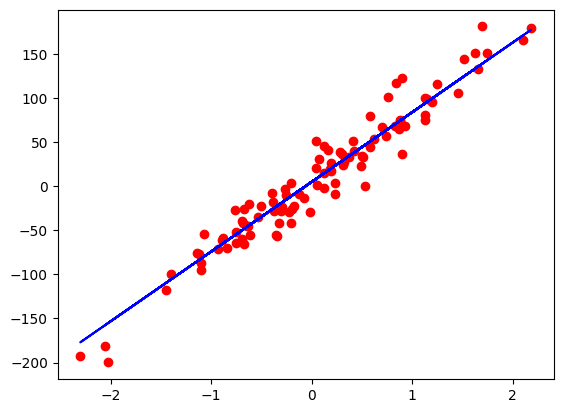

In [ ]:
from logging import critical
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

#converts sample to float from double
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)#reshape tensor

n_samples, n_features = x.shape

# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. loss and optimizer

criterion = nn.MSELoss()#built in loss function mse for linear regression
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. Training Loops

num_epochs = 200

for epoch in range(num_epochs) :
             #forward pass and loss
             y_predicted = model(x)
             loss = criterion(y_predicted, y)

             #backward pass
             loss.backward()

             #updates
             optimizer.step()

             #zero gradients
             optimizer.zero_grad()

             if (epoch + 1) % 10 == 0 :
                print(f'epoch : {epoch + 1}, loss = {loss.item():.4f}')
#plot

predicted = model(x).detach().numpy() #detach from tensor with require gradient false and convert to numpy


plt.plot(x_numpy, y_numpy, 'ro') #red dots x_numpy(x axis) vs y_numpy(y-axis)
plt.plot(x_numpy, predicted, 'b')#blue -> x_numpy(x axis) vs predicted (y axis)


In [ ]:
import torch
import torch.nn as nn #neural networks
import numpy as np # data transformations
from sklearn import datasets # load binary spec dataset
from sklearn.preprocessing import StandardScaler # scales dataset
from sklearn.model_selection import train_test_split # seperate training and test datasets

# 0. prepare data

bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

print(f"x, x.shape= {x.shape} and {x}")

print(f"y, y.shape= {y.shape} and {y}")

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234) # test size is 20 %

#scale
sc = StandardScaler() # for mean and avriance to be 0 for logistic regressions
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#convert to torch tensors numpy casting from double to float tensor

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#reshape y tensors into column vector
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1. model
# f= wx +b ,sigmoid at end

class LogisticRegression(nn.Module) :
             def __init__(self, n_input_features) :
                super(LogisticRegression, self).__init__()
                #layer 30 input features 1 class label at end(output feature)
                self.linear = nn.Linear(n_input_features, 1)
             def forward(self, x) :
                y_predicted = torch.sigmoid(self.linear(x))
                return y_predicted

model = LogisticRegression(n_features)

# 2. loss and optimizer

criterion = nn.BCELoss()#built in loss function mse for linear regression
learning_rate = 0.015
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 3. Training loop

num_epochs = 1000
for epoch in range(num_epochs) :
  #forward pass and loss
  y_predicted = model(x_train)
  loss = criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients prevents accumulation since backward just adds grads into .grad
  optimizer.zero_grad()

  if (epoch + 1) % 100 == 0 :
    print(f'epoch : {epoch + 1}, loss = {loss.item():.4f}')
with torch.no_grad():
  y_predicted = model(x_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) #correct prediction  egts added to 1 and divided by number of samples
  print(f'accuracy = {acc:.4f}')



x, x.shape= (569, 30) and [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y, y.shape= (569,) and [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset) :
          def __init__(self, transform=None) :
                #data loading
                xy = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
                self.x = torch.from_numpy(xy[:, 1:])
                self.y = torch.from_numpy(xy[:, [0]]) #n_samples, 1
                self.n_samples = xy.shape[0]
          def __getitem__(self, index) :
                #dataset[0]
                sample = self.x[index], self.y[index]
                if self.transform :
                  sample = self.transform(sample)
                return sample
          def __len__(self) :
                #len(dataset)
                return self.n_samples
class ToTensor:
          def __call__(self, sample) :
                inputs, targets = sample
                return torch.from_numpy(inputs), torch.from_numpy(targets)
dataset = WineDataset(transform = ToTensor)
first_data = dataset[0]
features, labels = first_data
print(f"feature type={type(features)},labels={type(labels)}")

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# print(features, labels)

nums_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs) :
  for i, (inputs, labels) in enumerate(dataloader) :
    #forward backward, update
    if (i+1) % 5 == 0 :
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')


feature=tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]),labels=tensor([1.])
178 45
epoch 1/1000, step 5/45, inputs torch.Size([4, 13])
epoch 1/1000, step 10/45, inputs torch.Size([4, 13])
epoch 1/1000, step 15/45, inputs torch.Size([4, 13])
epoch 1/1000, step 20/45, inputs torch.Size([4, 13])
epoch 1/1000, step 25/45, inputs torch.Size([4, 13])
epoch 1/1000, step 30/45, inputs torch.Size([4, 13])
epoch 1/1000, step 35/45, inputs torch.Size([4, 13])
epoch 1/1000, step 40/45, inputs torch.Size([4, 13])
epoch 1/1000, step 45/45, inputs torch.Size([2, 13])
epoch 2/1000, step 5/45, inputs torch.Size([4, 13])
epoch 2/1000, step 10/45, inputs torch.Size([4, 13])
epoch 2/1000, step 15/45, inputs torch.Size([4, 13])
epoch 2/1000, step 20/45, inputs torch.Size([4, 13])
epoch 2/1000, step 25/45, inputs torch.Size([4, 13])
epoch 2/1000, step 30/45, inputs torch.Size(

KeyboardInterrupt: 

torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1/2, step 100/600, loss=0.2097
epoch 1/2, step 200/600, loss=0.0896
epoch 1/2, step 300/600, loss=0.0609
epoch 1/2, step 400/600, loss=0.1211
epoch 1/2, step 500/600, loss=0.4047
epoch 1/2, step 600/600, loss=0.2549
epoch 2/2, step 100/600, loss=0.1396
epoch 2/2, step 200/600, loss=0.1503
epoch 2/2, step 300/600, loss=0.1538
epoch 2/2, step 400/600, loss=0.1331
epoch 2/2, step 500/600, loss=0.1143
epoch 2/2, step 600/600, loss=0.1280


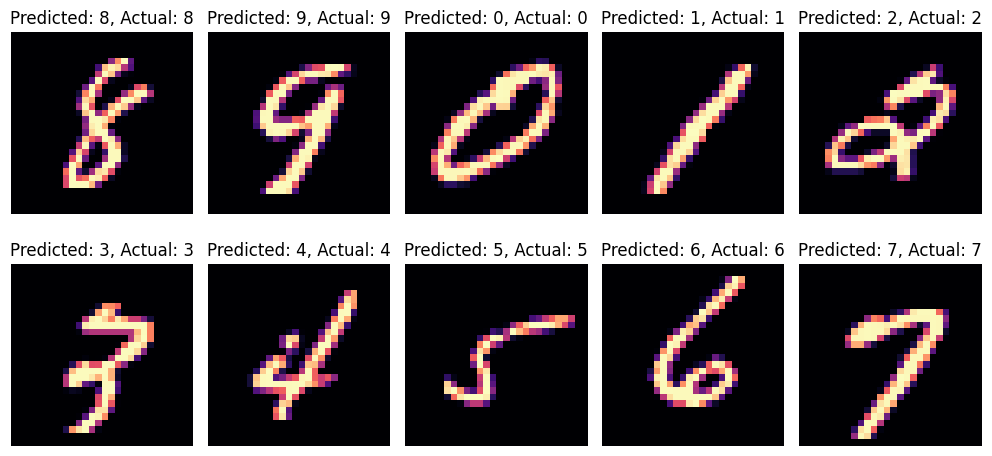

Accuracy = 96.74 %


In [ ]:
'''MNIST Feed Forward NN'''

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784 #28 x 28
hiden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

'''for i in range(10):
  plt.subplot(4,6,i+1)
  plt.imshow(samples[i][0], cmap='gray')
# plt.show()'''

class NeuralNet(nn.Module) :
  def __init__(self, input_size, hidden_size, num_classes) :
    super(NeuralNet, self).__init__()

    #layers
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x) :
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    #no softmax at end would be done by BCE
    return out

model = NeuralNet(input_size, hiden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Training

n_total = len(train_loader)
for epoch in range(num_epochs) :
  for i, (images, labels) in enumerate(train_loader) :
    #reshape images 100, 1, 28, 28 ->100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0 :
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total}, loss={loss.item():.4f}')

# test

with torch.no_grad() :
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader :
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs, 1) # '_'since first value(value of max confidence) is not needed prediction -> class labels
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  # Plot a few images with their predictions
  num_images_to_plot = 10  # Choose how many images to display

  plt.figure(figsize=(10, 5))  # Adjust figure size as needed
  for i in range(num_images_to_plot):
    plt.subplot(2, 5, i + 1)  # Create subplots (2 rows, 5 columns)
    plt.imshow(images[i].cpu().reshape(28, 28), cmap='magma')  # Display image
    plt.title(f"Predicted: {predictions[i].item()}, Actual: {labels[i].item()}")  # Set title with prediction and actual label
    plt.axis('off')  # Turn off axis ticks

  plt.tight_layout()  # Adjust spacing between subplots
  plt.show()  # Display the plot
  acc = 100.0 * n_correct / n_samples

  print(f"Accuracy = {acc} %")

Files already downloaded and verified
Files already downloaded and verified


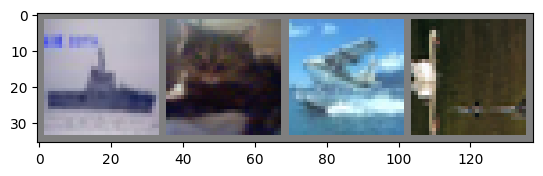

epoch 1/4, step 2000/12500, loss=1.8417
epoch 1/4, step 4000/12500, loss=2.2078
epoch 1/4, step 6000/12500, loss=1.2228
epoch 1/4, step 8000/12500, loss=1.2789
epoch 1/4, step 10000/12500, loss=0.7541
epoch 1/4, step 12000/12500, loss=2.1600
epoch 2/4, step 2000/12500, loss=1.1215
epoch 2/4, step 4000/12500, loss=1.7296
epoch 2/4, step 6000/12500, loss=0.8769
epoch 2/4, step 8000/12500, loss=0.9160
epoch 2/4, step 10000/12500, loss=0.6301
epoch 2/4, step 12000/12500, loss=0.6517
epoch 3/4, step 2000/12500, loss=1.3205
epoch 3/4, step 4000/12500, loss=1.2231
epoch 3/4, step 6000/12500, loss=2.0518
epoch 3/4, step 8000/12500, loss=0.3213
epoch 3/4, step 10000/12500, loss=0.7995
epoch 3/4, step 12000/12500, loss=1.0057
epoch 4/4, step 2000/12500, loss=0.6431
epoch 4/4, step 4000/12500, loss=0.7199
epoch 4/4, step 6000/12500, loss=1.6343
epoch 4/4, step 8000/12500, loss=1.7730
epoch 4/4, step 10000/12500, loss=0.5537
epoch 4/4, step 12000/12500, loss=0.3523
Finished Training


In [ ]:
'''CNN CIFAR10'''

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparams
num_epochs = 4
batch_size = 4
learning_rate = 0.00

#PILImage -> img of range(0,1)
#convert to tensors of range(-1,1)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# contains CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./CIFARdata', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./CIFARdata', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle = False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img) :
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

#get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

#show images
imshow(torchvision.utils.make_grid(images))

#define model
class ConvolutionNetwork(nn.Module) :
  def __init__(self) :
    super(ConvolutionNetwork, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x) :
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)

    #fully connected
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)

    return x

model = ConvolutionNetwork().to(device)

#loss and optimizer functions

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

#training loop
n_total = len(train_loader)
for epoch in range(num_epochs) :
  for i, (images, labels) in enumerate(train_loader) :
    images = images.to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()

    #updates
    optimizer.step()

    if (i+1) % 2000 == 0 :
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total}, loss={loss.item():.4f}')

print('Finished Training')




In [ ]:
#TEST

torch.save(model.state_dict(), './CNN.pth')

with torch.no_grad() :
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, label in test_loader :
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    predicted = torch.argmax(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predicted == labels).sum().item()
    for i in range(batch_size) :
      label = labels[i]
      pred = predicted[i]
      if (label == pred) :
        n_class_correct[label] += 1
      n_class_samples[label] += 1
  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy = {acc} %')


Accuracy = 11.57 %
